# Задача 3 (pytorch).
Реализовать любой пример нейронной сети в библиотеке pytorch. Необходимо
реализовать:
1. Загрузку данных через DataLoader
2. Архитектуру нейронной сети
3. Цикл обучения нейронной сети

Разрешается использовать примеры из оригинальной документации pytorch. Реализацию
необходимо подробно объяснить.



In [2]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

device ="cuda" if torch.cuda.is_available() else torch.device("cpu")

In [3]:
mnist_train = datasets.FashionMNIST(
    "data",
    download=True,
    transform=ToTensor()
)

mnist_test = datasets.FashionMNIST(
    "data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:00<00:00, 116779855.54it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 5603099.60it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 65519685.28it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7228750.25it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
train_dataloader = DataLoader(
    mnist_train,
    batch_size=128,
    shuffle=True,
    num_workers=4
)

test_dataloader = DataLoader(
    mnist_test,
    batch_size=128,
    num_workers=4
)
mnist_train

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

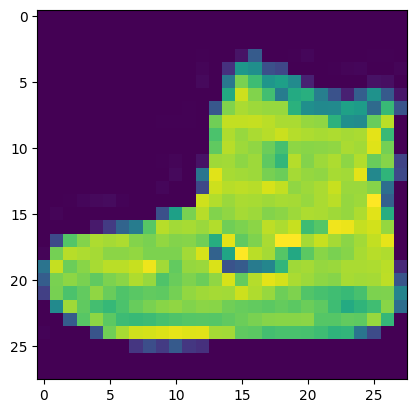

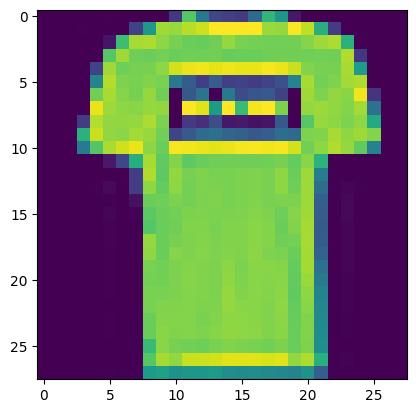

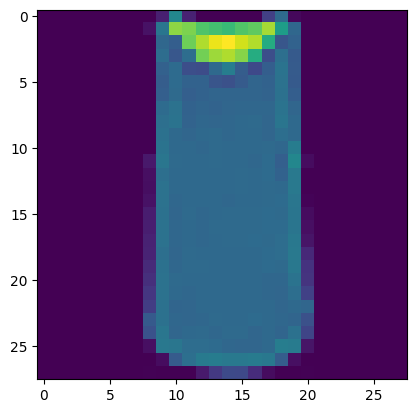

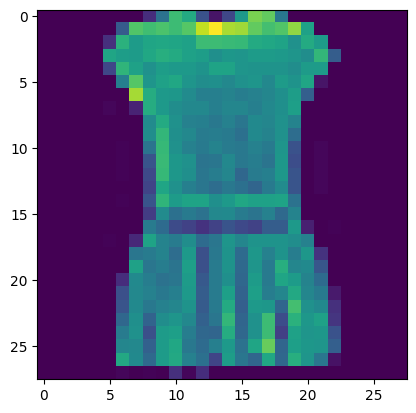

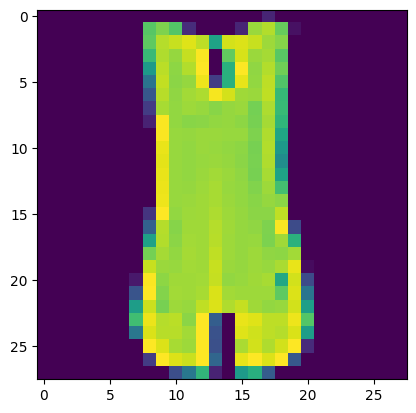

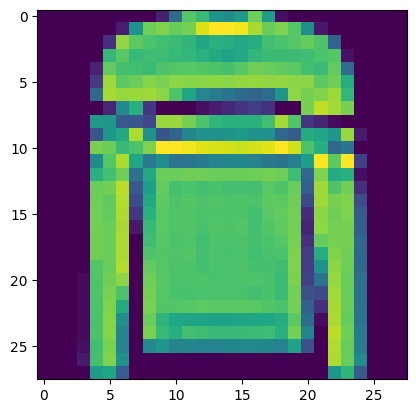

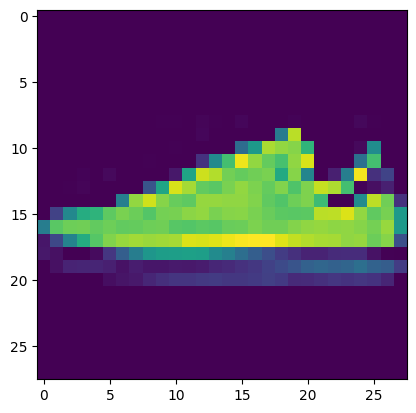

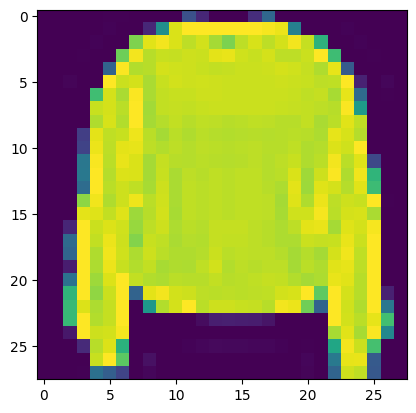

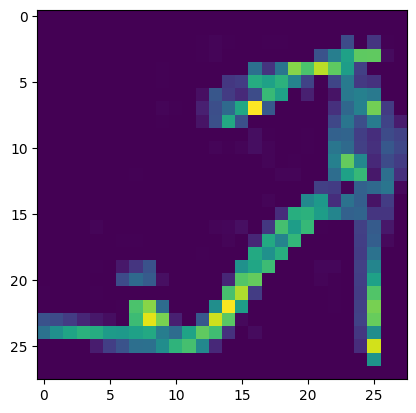

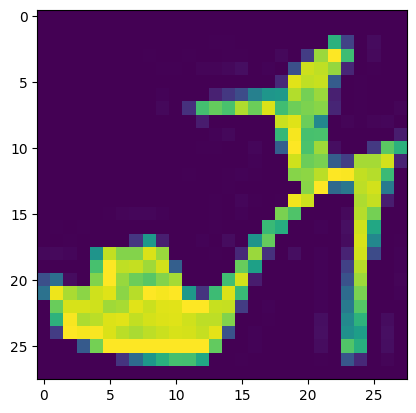

In [5]:
for i in range(10):
    plt.imshow(mnist_train[i][0][0])
    plt.show()

In [6]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear1 = nn.Linear(28 * 28, 128)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(128, 64) 
    self.linear3 = nn.Linear(64, 10) 

  def forward(self, x):
    x = self.flatten(x)
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)
    x = self.relu(x)
    out = self.linear3(x)

    return out

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
  size = len(dataloader.dataset)
  for batch, (X,Y) in enumerate(dataloader):
    pred = model(X.to(device))
    loss = loss_fn(pred, Y.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f'Train loss: {loss}, {current}/{size}')


In [8]:
def test_loop(dataloader, model, loss_fn, device):
  test_loss, acc = 0,0
  with torch.no_grad():
    for X, Y in dataloader:
      pred = model(X.to(device))
      test_loss += loss_fn(pred, Y.to(device)).item()
      acc += (pred.argmax(1) == Y.to(device)).type(torch.float).sum().item()
  test_loss /= len(dataloader)
  acc /= len(dataloader.dataset)
  print(f'Test error: \n accuracy: {(100*acc):>0.1f}%, avg_loss: {test_loss:>8f} \n')

In [9]:
EPOCHS = 10
LR = 1e-3

model = NeuralNet().to(device)
Loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

for i in range(EPOCHS):
  print(f'Epoch: {i}')
  train_loop(train_dataloader, model, Loss_func, optimizer,device)
  test_loop(train_dataloader, model, Loss_func,device)

Epoch: 0
Train loss: 2.3032853603363037, 0/60000
Train loss: 0.6533434391021729, 12800/60000
Train loss: 0.5504542589187622, 25600/60000
Train loss: 0.5220373272895813, 38400/60000
Train loss: 0.46875888109207153, 51200/60000
Test error: 
 accuracy: 83.5%, avg_loss: 0.462587 

Epoch: 1
Train loss: 0.6053556203842163, 0/60000
Train loss: 0.39142751693725586, 12800/60000
Train loss: 0.3258844316005707, 25600/60000
Train loss: 0.4890780448913574, 38400/60000
Train loss: 0.3253932297229767, 51200/60000
Test error: 
 accuracy: 85.7%, avg_loss: 0.397921 

Epoch: 2
Train loss: 0.45240068435668945, 0/60000
Train loss: 0.38325250148773193, 12800/60000
Train loss: 0.29807621240615845, 25600/60000
Train loss: 0.5942811965942383, 38400/60000
Train loss: 0.4677787721157074, 51200/60000
Test error: 
 accuracy: 87.1%, avg_loss: 0.358051 

Epoch: 3
Train loss: 0.35025015473365784, 0/60000
Train loss: 0.35798928141593933, 12800/60000
Train loss: 0.4108319878578186, 25600/60000
Train loss: 0.43319407105